# Introduction
In this notebook we will cover several topics:
- Logistic Regression
- Support Vector Machines (linear)

We will start of with a synthetic dataset to compare the different methods. All models are linear models and work with linear data. Support Vector Machines can work with non-linear data, but we will get into that later.

# Logistic Regression
Logistic regression is a classification technique. It is also known as logit-regression. It outputs probabilities which are modeled using a logistic function. 

Scikit-learn provides the `LogisticRegression` class for classification. It is able to fit binary, One-vs-Rest, or multinomial logistic regression. You have the option to set $l_1$, $l_2$, or Elastic-Net (both) regularization.

For an extensive description, see the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html" target="_blank">documentation</a> or <a href="https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression" target="_blank">user guide</a>

In this model, the probabilities describing the possible outcomes of a single trial are modeled using a logistic function. I will summarizing some important aspects of the mentioned function.

### Logistic Function
A logistic function or logistic curve is a common S-shaped curve (sigmoid curve) with equation 

$$
f(x) = \frac{L}{1 + e^{-k \cdot (x-x_0)}}\
$$

where
1. x0, the x value of the function's midpoint;
2. L , the supremum of the values of the function;
3. k , the logistic growth rate or steepness of the curve.

The logistic function finds applications in a range of fields, including biology (especially ecology), biomathematics, chemistry, demography, economics, geoscience, mathematical psychology, probability, sociology, political science, linguistics, statistics, and artificial neural networks. A generalization of the logistic function is the hyperbolastic function of type I. [<a href="https://en.wikipedia.org/wiki/Logistic_function" target="_blank">wiki</a>]

In sklearn.LogisticRegression, Regularization is done as the default setting, so it seems it can be is necessary to know about its properties. Consequently in the next step I will shortly describe this concept.

### Regularization
One crucial aspect of training a machine learning model is to prevent overfitting. When a model overfits, its accuracy is negatively affected. This occurs when the model excessively focuses on capturing the noise present in the training dataset. By noise, we refer to data points that do not genuinely reflect the true characteristics of the data, but rather arise from random chance. Incorporating such data points into the learning process enhances the model's adaptability but increases the likelihood of overfitting.

Understanding the phenomenon of overfitting becomes clearer when considering the concept of balancing bias and variance. In the handout of this section, I explained these two concepts fully.

Anothe method is Cross-validation which is a valuable technique for mitigating overfitting as it aids in estimating the error on a test set and determining the optimal parameters for your model. I extensively explain this concept through the handout, so for further explanation one can refer to the mentioned document.

This technique (regularization) is a form of regression that applies constraints or shrinkage to the coefficient estimates, driving them towards zero. In essence, it discourages the model from learning excessive complexity or flexibility, thereby mitigating the potential for overfitting. This techniques has a quite important coefficient λ that is the tuning parameter that decides how much we want to penalize the flexibility of our model When the value of λ is set to 0 in ridge regression, the penalty term has no effect, resulting in coefficient estimates that are equivalent to those obtained through ordinary least squares. Conversely, as the value of λ approaches infinity, the impact of the shrinkage penalty increases, causing the ridge regression coefficient estimates to approach zero. Hence, the selection of an appropriate value for λ is crucial in achieving desirable results.

Regulation is divided into two techniques, one is Ridge Regression (also called L2) and another one is Lasso (also called L1). the first technique uses square of the parameter to control flexibility of the model, while the later utilizes the absolute value of the parameters to panelize the flexibility. One drawback of ridge regression is its impact on model interpretability. It tends to shrink the coefficients of less important predictors towards zero, but it never eliminates them entirely. As a result, the final model includes all predictors. In contrast, the lasso method, which incorporates an L1 penalty, has the ability to force certain coefficient estimates to become exactly zero when the tuning parameter λ is sufficiently large. Consequently, the lasso method facilitates variable selection and produces sparse models.

In conclusion, Regularization plays a crucial role in effectively managing the bias-variance trade-off of a model. By using the tuning parameter λ in the aforementioned regularization techniques, it is possible to control the impact on both bias and variance. As the value of λ increases, the coefficients are reduced, leading to a decrease in variance. Up to a certain threshold, this increase in λ proves beneficial by solely reducing variance and preventing overfitting, without sacrificing important properties inherent in the data. However, beyond a certain point, the model begins to lose those important properties, resulting in increased bias and underfitting. Hence, the value of λ should be chosen diligently to strike the right balance.

For further study and mathematical explanation of the mentioned method one can visit this <a href="https://towardsdatascience.com/regularization-in-machine-learning-76441ddcf99a" target="_blank">link</a>.

As it is mentioned above, the method can fit binary, One-vs-Rest, or multinomial logistic regression, so I will explain these methods here.

### Binary Case 
In scikit-learn, the LogisticRegression class supports binary classification by default. It uses a logistic function (also known as the sigmoid function) to map the input features to probabilities of the positive class. The decision boundary is determined based on a threshold value (usually 0.5), where predictions with probabilities above the threshold are assigned to the positive class, and predictions below the threshold are assigned to the negative class. In this specific case, there are only two classes.

###  Multinomial Logistic Regression
Multinomial logistic regression is a statistical classification method that extends logistic regression to handle multiclass problems, where there are more than two possible discrete outcomes. It is a predictive model used to estimate the probabilities of various outcomes for a dependent variable that follows a categorical distribution. This is achieved by considering a set of independent variables, which can be real-valued, binary-valued, categorical-valued, and so on. [[<a href="https://en.wikipedia.org/wiki/Multinomial_logistic_regression#As_a_log-linear_model" target="_blank">wiki</a>]]

### One-vs-Rest
The One-vs-Rest (OvR) method, also known as One-vs-All, is a strategy used in multiclass logistic regression (and other multiclass classification algorithms) to handle problems with multiple classes. In contrast to Multinomial method that directly models the probabilities of multiple classes without decomposing the problem into binary subproblems, In OvR, a separate binary logistic regression model is trained for each class, treating it as the positive class, while considering all other classes as the negative class. This results in a set of binary classifiers, where each classifier is responsible for distinguishing one class from the rest. The OvR method is effective for multiclass problems because it allows logistic regression, which is inherently a binary classification algorithm, to be extended to handle multiple classes. It simplifies the multiclass problem by breaking it down into a series of binary classification subproblems.

The last part of this explanation is about 'solvers'.

### Solvers
the solver parameter refers to the algorithm used to solve the optimization problem when fitting the logistic regression model. The choice of solver can impact the computational efficiency and accuracy of the model. LogisticRegression offers a group of solvers that I will shortly describe them below. for further explanation please click on this <a href="https://scikit-learn.org/stable/modules/linear_model.html#id36" target="_blank">link</a>.

#### 'liblinear':
This solver is a good choice for small-to-medium-sized datasets and supports both binary and multiclass problems. It is based on the LIBLINEAR library and uses a coordinate descent algorithm.

#### 'newton-cg':
This solver uses the Newton-CG method, which is a variant of Newton's method with conjugate gradient optimization. It is suitable for both binary and multiclass problems, but it may have difficulties with large datasets.

#### 'lbfgs':
The Limited-memory Broyden-Fletcher-Goldfarb-Shanno (LBFGS) solver approximates the inverse Hessian matrix using a limited memory approach. It is effective for small-to-medium-sized problems and works well for both binary and multiclass classification.

#### 'sag': 
The Stochastic Average Gradient (SAG) solver is designed for large-scale problems. It utilizes a stochastic average approximation approach and can handle both binary and multiclass cases.

#### 'saga': 
The SAGA solver is an extension of the SAG solver. It supports L1 regularization and is suitable for large-scale problems with both binary and multiclass classification.

The table on the above link shows one how to use these solvers.

Important last tip: LogisticRegressionCV implements Logistic Regression with built-in cross-validation support, to find the optimal C and l1_ratio parameters according to the scoring attribute. The “newton-cg”, “sag”, “saga” and “lbfgs” solvers are found to be faster for high-dimensional dense data, due to warm-starting

# Support Vector Machines (SVMs)
SVMs are a set of supervised methods that can be used for classification, regression and outlier detection. In this notebook, we will focus on classification.

Advantages:
- Effective in high dimensional spaces.
- Can still be effective when the number of features are bigger than the number of samples.
- Memory efficient.
- Different types of kernels, although we will focus on linear kernels.

Disadvantages:
- If the number of features is greater than the number of samples, regularization is critical to prevent overfitting.
- SVMs do not directly provide probability estimates, such as with logistic regression.

There are different types of SVMs. Scikit-learn provides several for classification:
- `SVC`: implementation based on *libsvm*. Fit time scales at quadratically.
- `NuSVC`: similar to `SVC` but controls the number of support vectors.
- `LinearSVC`: fast implementation for linear kernel.

In our case it is easiest to use LinearSVC, but feel free to play around with other configurations.

For an extensive description, see the <a href="https://scikit-learn.org/stable/modules/classes.html#module-sklearn.svm" target="_blank">documentation</a> or <a href="https://scikit-learn.org/stable/modules/svm.html#svm" target="_blank">user guide</a>

I will not go into detail of this method here since this method is explained extensively in the handout file.

The last concept that I want to explain here is Grid Search.

Generally each classification method  should follow  a set of actions (stages) to make the best model. Here I will explain these stages using SVM as an example. The stages are as follow

1. Data Preparation: Collect and preprocess the dataset. This includes data cleaning, handling missing values, and feature scaling, if necessary.

2. Feature Selection/Extraction: Choose relevant features from the dataset or perform feature extraction techniques to transform the data into a suitable format for SVM.

3. Splitting the Data: Divide the dataset into training and testing sets. The training set is used to train the SVM model, while the testing set is used to evaluate its performance.

4. Model Training: Train the SVM model using the training data. This involves finding the optimal hyperplane that maximizes the margin between different classes or minimizes the classification error.

5. Model Selection: Choose the appropriate type of SVM (e.g., linear SVM, kernel SVM) and tune the hyperparameters (e.g., kernel type, regularization parameter) using techniques like cross-validation or grid search.

6. Model Evaluation: Evaluate the trained SVM model on the testing data to assess its performance. Common evaluation metrics for classification tasks include accuracy, precision, recall, F1 score, and ROC curve.

7. Model Fine-tuning: If the model's performance is not satisfactory, you can experiment with different hyperparameter values or try different kernel functions to improve the results.

8. Model Deployment: Once you are satisfied with the SVM model's performance, you can deploy it to make predictions on new, unseen data.

The only steps that are different for different classificarion methods are four and five since the models and the hyperparameters  are different from each other.

# Demo

## Classification Methods

In [1099]:
# General modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import re

# Data generating and feature modules
from sklearn.datasets import make_classification
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

# Classification modules
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.inspection import DecisionBoundaryDisplay
from pygam import LogisticGAM
from sklearn.pipeline import Pipeline

# Evaluation modules
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

# Model selection modules
from sklearn.model_selection import  cross_validate
from sklearn.model_selection import GridSearchCV


### Create dataset with linear signals
Let's create a linear dataset for demonstration purposes and look at the classification performance.

#### make_classification
This initially creates clusters of points normally distributed (std=1) about vertices of an n_informative-dimensional hypercube with sides of length 2*class_sep and assigns an equal number of clusters to each class. It introduces interdependence between these features and adds various types of further noise to the data. <a href="https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html" target="_blank">documentation</a>

Data split:
- Training set: first 100 samples
- Test set: last 100 samples

In [1100]:
X_linear, y_linear = make_classification(n_samples=200, # number of samples
                           n_features=2, # total number of  features
                           n_informative=2, # number of informative feature
                           n_redundant=0, # number of redundant features
                           random_state=0, # determines random number generation
                           shuffle=True) # Shuffle the samples and the features.

print(X_linear.shape, y_linear.shape)

(200, 2) (200,)


<function matplotlib.pyplot.show(close=None, block=None)>

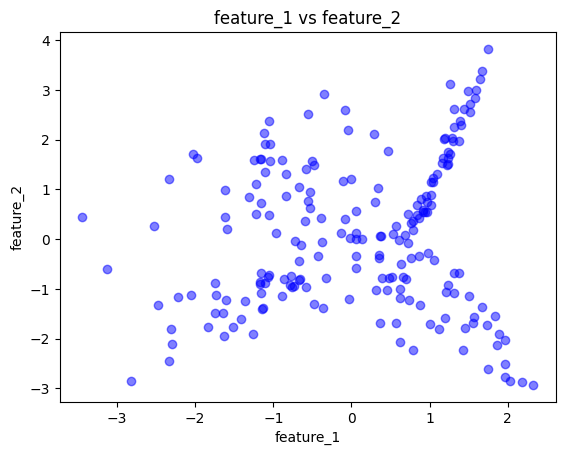

In [1101]:
# plot the dataset for a better understanding
fig = plt.figure()
plt.scatter( X_linear[:, 0], X_linear[:, 1], c='b', alpha=0.5)
plt.title('feature_1 vs feature_2')
plt.xlabel('feature_1')
plt.ylabel('feature_2')
plt.show

In [1102]:
# find the number of members in each class
print(f'{np.unique(y_linear, return_counts=True)}')

# Find the extermums of the dataset
print(X_linear.min(), X_linear.max())

# divide the data into two halves. One for training and another one for testing
X_train_linear, X_test_linear = X_linear[:100], X_linear[100:]
y_train_linear, y_test_linear = y_linear[:100], y_linear[100:]

(array([0, 1]), array([100, 100], dtype=int64))
-3.4423002664236364 3.8246288578434964


##### Setup models

In [1103]:
# make the models
lr = LogisticRegression()
svm = LinearSVC()

In [1104]:
# train the models by using training data
lr.fit(X_train_linear, y_train_linear)
svm.fit(X_train_linear, y_train_linear)

LinearSVC()

One can plot support vectors and decision boundary to see how much this model based on the magnitude of C can act better. LinearSVC does not support the calculation of support vectors; consequently, one should calculate them manually.

In [1105]:
# Using this link: 
# https://scikit-learn.org/stable/auto_examples/svm/plot_linearsvc_support_vectors.html#sphx-glr-auto-examples-svm-plot-linearsvc-support-vectors-py
# LinearSVC does not support support vector extraction so we have extract them manually.

def plotting_support_vectors(linear_svm, X, X_train, y_train):
    """
    this function can only cover TWO feathers at the same time
    """

    # Predict confidence scores for training samples.
    decision_values = linear_svm.decision_function(X_train)
    plt.figure(figsize=(8, 5))

    # The support vectors are the samples that lie within the margin
    # boundaries, whose size is conventionally constrained to 1
    support_vector_indices = np.where(np.abs(decision_values) <= 1 + 1e-15)[0]
    support_vectors = X[support_vector_indices]

    # plot the points
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=30, cmap=plt.cm.RdBu)

    ax = plt.gca()

    # plot the desicion boundaries
    DecisionBoundaryDisplay.from_estimator(
        linear_svm,
        X,
        ax=ax,
        grid_resolution=50,
        plot_method="contour",
        colors="k",
        levels=[-1, 0, 1],
        alpha=0.5,
        linestyles=["--", "-", "--"],
        )
    
    # bold the points in the desicion boundaries
    plt.scatter(
        support_vectors[:, 0],
        support_vectors[:, 1],
        s=100,
        linewidth=1,
        facecolors="none",
        edgecolors="k",
        )
    
    plt.tight_layout()
    plt.title('Support vectors and desicion boundary')
    plt.xlabel('feature_1')
    plt.ylabel('feature_2')
    plt.show()

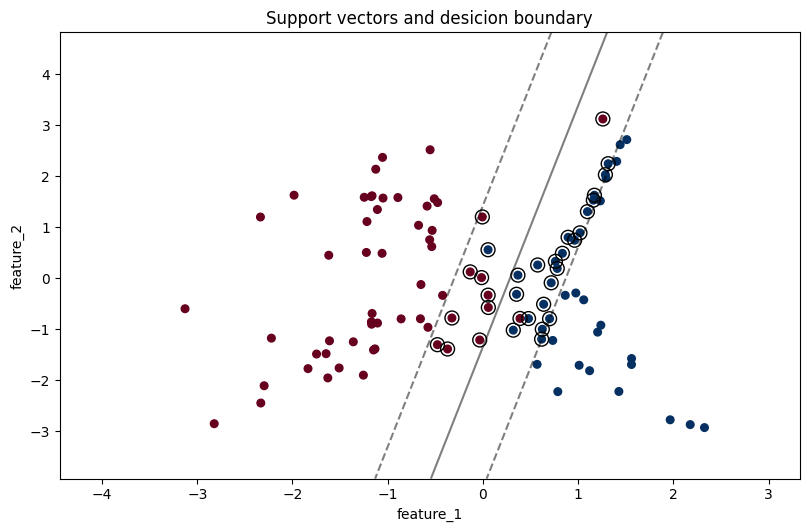

In [1106]:
plotting_support_vectors(svm, X_linear, X_train_linear, y_train_linear)

##### Contours

In [1107]:
def make_meshgrid(X, h=.01):
    """
    Create a mesh grid based on vectors X and Y. This meshgrid will 
    used in some visualizations such as vontour plots
    """
    if X.shape[1] > 2:
        raise ValueError('Requires a matrix of 2 features for visualization purposes.')
    
    x_min = X.min() - 1
    x_max = X.max() + 1
        
    x = np.arange(x_min, x_max, h)
    
    # Return a list of coordinate matrices from coordinate vectors.
    xx, yy = np.meshgrid(x, x)
    
    return xx, yy


In [1108]:
# make the meshgrid 
xx, yy = make_meshgrid(X_linear)

#--------------------------------------
# np.array.ravel(): returns contiguous flattened array(1D array with all the input-array 
#                   elements and with the same type as it).
#  np.c_: add along second axis.
#--------------------------------------

# make the grid
grid = np.c_[xx.ravel(), yy.ravel()] 

In [1109]:
grid.shape

(859329, 2)

In [1110]:
# get the predictions, svm does not have probabilities, only confidence intervals
# The returned estimates for all classes are ordered by the label of classes.
# then reshape it again into the form of meshgrid
lr_prob = lr.predict_proba(grid)[:, 1].reshape(xx.shape)

# Predict class labels for samples in X.
svm_pred = svm.predict(grid).reshape(xx.shape)

# find the values of the testing data point within the margin area
decision_values_model = svm.decision_function(grid).reshape(xx.shape)

In [1111]:
def making_contour(model_dict, title):

    plots_number = len(model_dict)

    num_cols = math.ceil(math.sqrt(plots_number))
    num_rows = math.ceil(plots_number / num_cols)
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(10,7))

    if len(title)!=0:
        fig.suptitle(title)

    if len(model_dict) > 1:
        # flatten for easier manipulation
        axes.ravel()
    else:
        axes = [axes]

    for counter, key in enumerate(model_dict):
        data_dict = model_dict[key][-1]

        contour = axes[counter].contourf(data_dict['xx'], data_dict['yy'], model_dict[key][0],
                                          25, cmap=plt.cm.RdBu, alpha=0.8)

        # add the color bar for logestic regression
        if re.search(r'lo.*r', key, re.IGNORECASE):
            
            ax_c = fig.colorbar(contour, location='bottom', fraction=0.02)
            ax_c.set_label('$P(y = 1)$')
            ax_c.set_ticks([0, .25, .5, .75, 1])
        
        # add desicion boundary to svm contour
        elif re.search(r'sv', key, re.IGNORECASE):
            axes[counter].contour(data_dict['xx'], data_dict['yy'], model_dict[key][1], colors='k', levels=[-1, 0, 1],
                                   alpha=0.5, linestyles=['--', '-', '--'])

        # plot the test data
        axes[counter].scatter(data_dict['x_test'][:, 0], data_dict['x_test'][:, 1], c=data_dict['y_test'],
                               edgecolor='white', linewidth=1, s=50, cmap=plt.cm.RdBu)

        # set some labels
        axes[counter].set(aspect='equal',
                          xlim=(data_dict['X'].min() - 1, data_dict['X'].max() + 1),
                          ylim=(data_dict['X'].min() - 1, data_dict['X'].max() + 1),
                          xlabel='$X_1$',
                          ylabel='$X_2$')
        
        axes[counter].set_title(f'{key} model')
    
    plt.show()

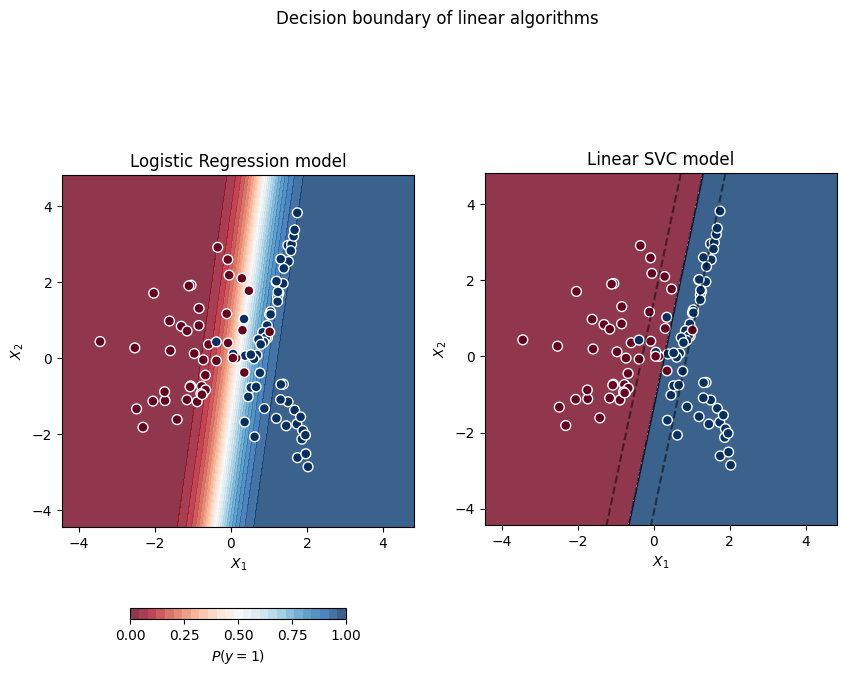

In [1112]:
# make the contour plot
data_dict = {'X': X_linear,
             'xx':xx,
             'yy':yy,
             'x_test':X_test_linear,
             'y_test':y_test_linear
             }
model_dict= {'Logistic Regression':[lr_prob, data_dict],
             'Linear SVC': [svm_pred, decision_values_model, data_dict]}

title = 'Decision boundary of linear algorithms'

making_contour(model_dict, title)

We can clearly see that linear algorithms are exceptionally good at separating linear signals. What would happen if we have a dataset with non-linear signals?

In [1113]:
# Make two interleaving half circles.
X_curve, y_curve = make_moons(n_samples=200, random_state=0, shuffle=True)

X_train_curve, X_test_curve = X_curve[:100], X_curve[100:]
y_train_curve, y_test_curve = y_curve[:100], y_curve[100:]

In [1114]:
lr = LogisticRegression()
svm = LinearSVC()

lr.fit(X_train_curve, y_train_curve)
svm.fit(X_train_curve, y_train_curve)

LinearSVC()

In [1115]:
xx, yy = make_meshgrid(X_curve)
grid = np.c_[xx.ravel(), yy.ravel()]

lr_prob = lr.predict_proba(grid)[:, 1].reshape(xx.shape)
svm_pred = svm.predict(grid).reshape(xx.shape)
decision_values_model = svm.decision_function(grid).reshape(xx.shape)

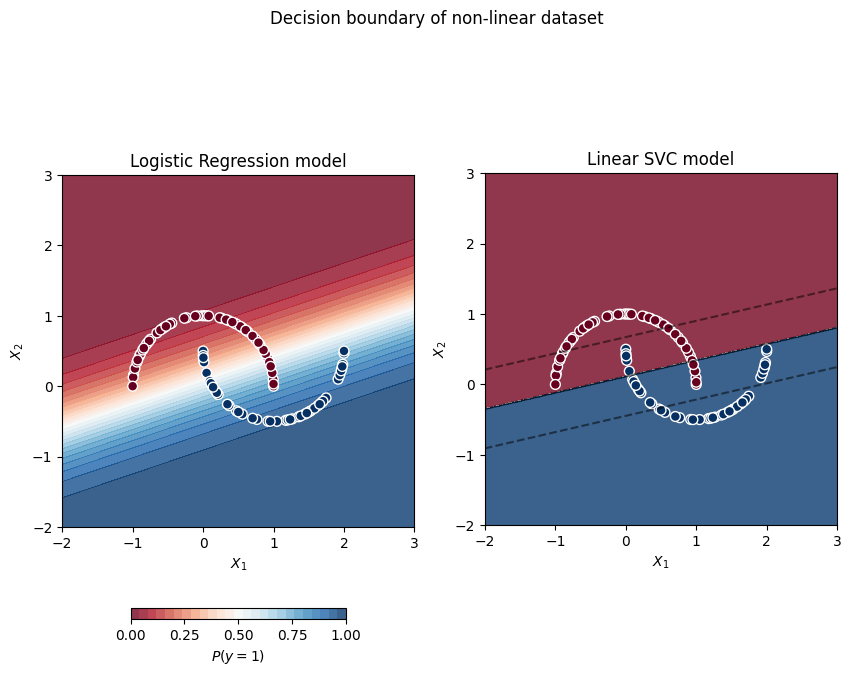

In [1116]:
# make the contour plot
data_dict = {'X': X_curve,
             'xx':xx,
             'yy':yy,
             'x_test':X_test_curve,
             'y_test':y_test_curve
             }
model_dict= {'Logistic Regression':[lr_prob, data_dict],
             'Linear SVC': [svm_pred, decision_values_model, data_dict]}

title = 'Decision boundary of non-linear dataset'

making_contour(model_dict, title)

We can clearly see that linear models are unable to separate non-linear signals. This results in inaccurate representations. It is important to understand that different models are useful in different situations. Most real life dataset contain a mixture of linear and non-linear signals.

**Conclusion**:
- Linear models are exceptionally good in separating linear-signals.
- We need other methods to separate non-linear signals.

To continue I will try some non-linear models. none linear models can be divided into different categories but two of them are SVM models with different kernels one with 'rbf' and another one with polynomial kernels. each of them has their own distinct mathematical and logical background that make them useful in different situations. 

In [1117]:
non_linear_svc = SVC(kernel='rbf')
non_linear_svc.fit(X_train_curve, y_train_curve)
svm_pred = non_linear_svc.predict(grid).reshape(xx.shape)

# find the values of the testing data point within the margin area
decision_values_model = non_linear_svc.decision_function(grid).reshape(xx.shape)

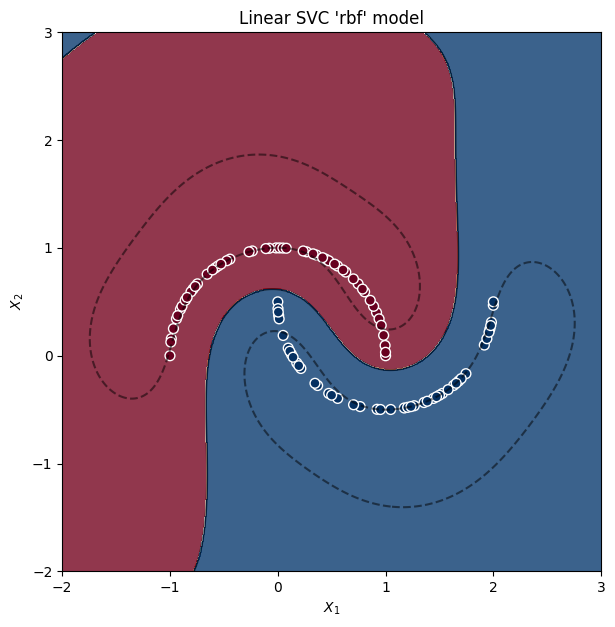

In [1118]:
# make the contour plot
data_dict = {'X': X_curve,
             'xx':xx,
             'yy':yy,
             'x_test':X_test_curve,
             'y_test':y_test_curve
             }

model_dict= {'Linear SVC \'rbf\'': [svm_pred, decision_values_model, data_dict]}

title = ''

making_contour(model_dict, title)

In [1119]:
non_linear_svc = SVC(kernel='poly', degree=3)
non_linear_svc.fit(X_train_curve, y_train_curve)
svm_pred = non_linear_svc.predict(grid).reshape(xx.shape)

# find the values of the testing data point within the margin area
decision_values_model = non_linear_svc.decision_function(grid).reshape(xx.shape)

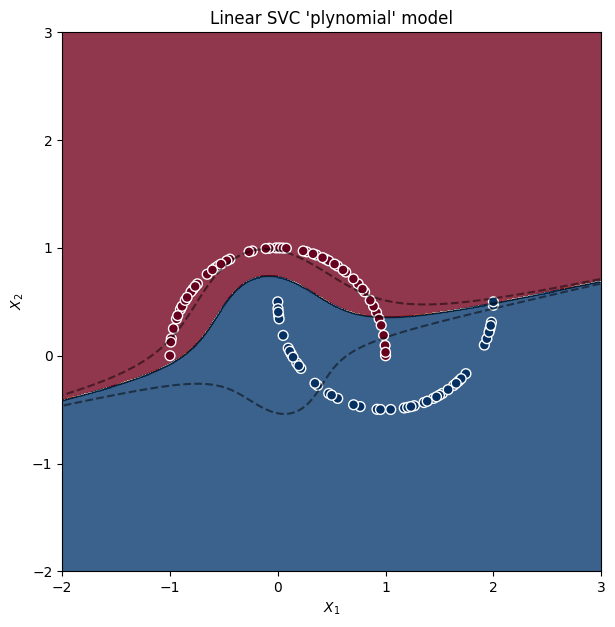

In [1120]:
# make the contour plot
data_dict = {'X': X_curve,
             'xx':xx,
             'yy':yy,
             'x_test':X_test_curve,
             'y_test':y_test_curve
             }

model_dict= {'Linear SVC \'plynomial\'': [svm_pred, decision_values_model, data_dict]}

title = ''

making_contour(model_dict, title)

In cases where the data is completely separated nonlinearly, the 'rbf' kernel is often the optimal choice. This is because the 'rbf' kernel maps the data to an infinite number of dimensions using Infinitely Smooth Radial Basis Functions. This high-dimensional mapping provides greater flexibility in separating clusters with complex non-linear patterns, surpassing the limitations of polynomial functions that use a limited number of dimensions for mapping. Additionally, the 'rbf' kernel treats each data point as the center of a Gaussian-like function, and the similarity or distance is determined by the value of the Gaussian function at each point. By assigning higher weights to closer data points and decreasing weights as distance increases, the 'rbf' kernel exhibits enhanced flexibility. On the other hand, the polynomial kernel treats all points with the same weight, which limits its ability to capture intricate relationships in the data.

To continue this notebook, one can study about non-linear form of logistic regression.

In [1121]:
lr = LogisticRegression(solver='newton-cholesky')
lr.fit(X_train_curve, y_train_curve)
lr_prob = lr.predict_proba(grid)[:, 1].reshape(xx.shape)

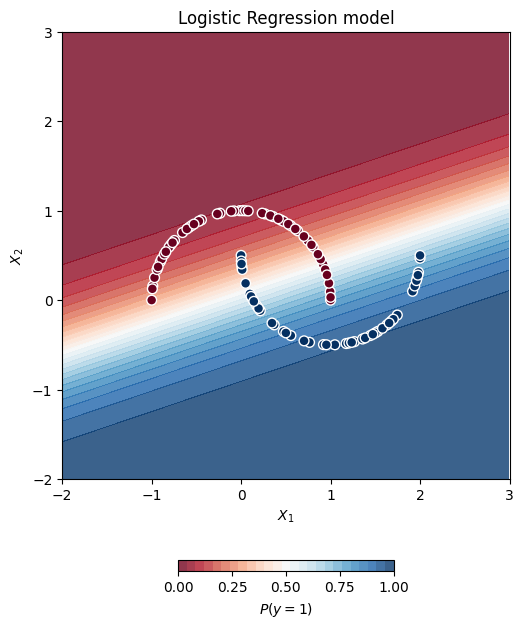

In [1122]:
# make the contour plot
data_dict = {'X': X_curve,
             'xx':xx,
             'yy':yy,
             'x_test':X_test_curve,
             'y_test':y_test_curve
             }

model_dict= {'Logistic Regression': [lr_prob, data_dict]}

title = ''

making_contour(model_dict, title)

As it can be seen the logistic regression canat divide the clusters properly from each other the reason is that this method is designed to act on linear datasets. Consequently, there are two ways that one can use logistic regression to deal with non-linear datasets.

The first method is to map the features to higher dimensions in order to capture non-linear relationships between the predictors and the target variables. This can be achieved using modules like sklearn.PolynomialFeatures, which maps the features to a higher degree space using polynomial metrics. This process is analogous to the feature mapping performed in SVM, but in this case, the mapping needs to be done manually.

In [1123]:
# Create the polynomial transformer
poly_transformer = PolynomialFeatures(degree=5)

# Fit and transform the training features
X_train_poly = poly_transformer.fit_transform(X_train_curve)

# Transform the testing features
X_test_poly = poly_transformer.transform(X_test_curve)

X_mesh_poly = poly_transformer.transform(grid)

In [1124]:
# Create an instance of the logistic regression model
lr = LogisticRegression()

# Fit the model to the polynomial features
lr.fit(X_train_poly, y_train_curve)
lr_pred = lr.predict(X_test_poly)
lr_prob = lr.predict_proba(X_mesh_poly)[:, 1].reshape(xx.shape)

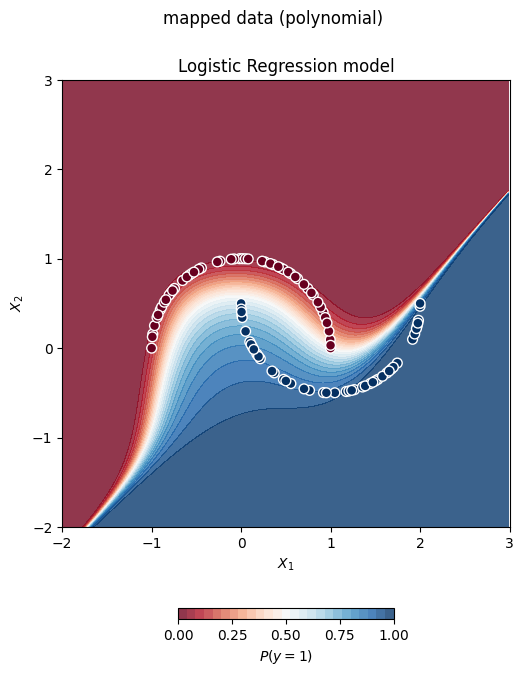

In [1125]:
# make the contour plot
data_dict = {'X': X_curve,
             'xx':xx,
             'yy':yy,
             'x_test':X_test_curve,
             'y_test':y_test_curve
             }

model_dict= {'Logistic Regression': [lr_prob, data_dict]}

title = 'mapped data (polynomial)'

making_contour(model_dict, title)

Another approach to handle non-linear relationships is by using Generalized Additive Models (GAMs). GAMs are a type of generalized linear model where the linear response variable depends on unknown smooth functions of the predictor variables. The focus is on inferring these smooth functions. In GAMs, a univariate response variable Y is related to predictor variables xi. The response variable Y follows an exponential family distribution, such as normal, binomial, or Poisson distributions, and is linked to the predictor variables through a link function g, such as the identity or logarithmic function. GAMs allow for flexible modeling of non-linear relationships between the predictors and the response variable by incorporating these smooth functions. This approach provides a powerful tool for capturing complex relationships and making inferences about the effects of predictors in a non-linear framework. [<a href="https://en.wikipedia.org/wiki/Generalized_additive_model" target="_blank">wiki</a>]

In addition, GAMs offer an extension to logistic regression by accommodating non-linear relationships using smooth functions. In this educational notebook, I will demonstrate the implementation of this technique for non-linear datasets using the pyGAM library. With pyGAM, we can easily incorporate smooth functions to capture complex and non-linear patterns in the data, thereby enhancing the predictive power of logistic regression.




In [1126]:
model = LogisticGAM()
fitted_model = model.fit(X_train_curve, y_train_curve)
predictions = fitted_model.predict(X_test_curve)
lr_prob = model.predict_proba(grid).reshape(xx.shape)

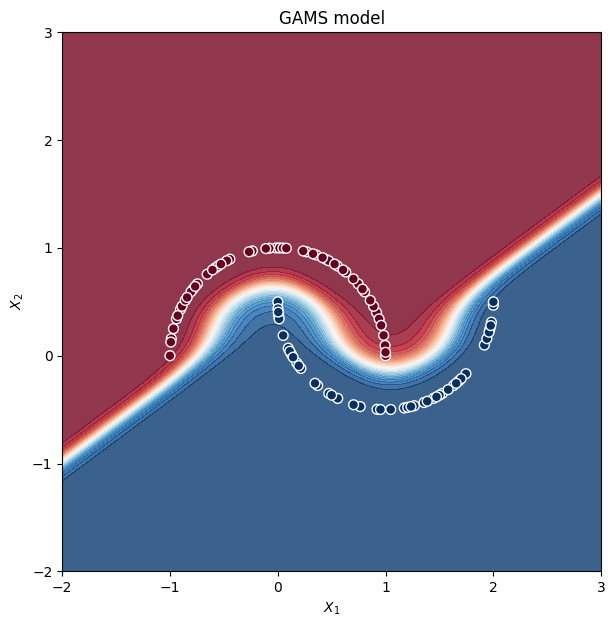

In [1127]:
# make the contour plot
data_dict = {'X': X_curve,
             'xx':xx,
             'yy':yy,
             'x_test':X_test_curve,
             'y_test':y_test_curve
             }

model_dict= {'GAMS': [lr_prob, data_dict]}

title = ''

making_contour(model_dict, title)

Both of these methods demonstrate good consistency with this non-linear dataset. However, relying solely on visual plots to assess the validity of a model's predictions may not be the most robust approach. Therefore, in the subsequent section, I will discuss various evaluation methods commonly used to assess the performance of a classification model.

## 2. Model Evaluation methods
Evaluation methods are essential for assessing the validity and reliability of classification methods. These methods vary in their mathematical and logical frameworks, making them suitable for different purposes. In this discussion, I will highlight some popular evaluation methods that are widely recognized for their credibility.


1. **Precision and Recall**: In a classification task, Precision and recall are metrics that focus on the performance of the model for a specific class. Precision refers to the ratio of true positives (correctly labeled items belonging to the positive class) to the total number of elements labeled as positive (the sum of true positives and false positives, which are items incorrectly labeled as belonging to the class). On the other hand, recall is defined as the ratio of true positives to the total number of elements that actually belong to the positive class (the sum of true positives and false negatives, which are items that were not labeled as belonging to the positive class but should have been). [<a href="https://en.wikipedia.org/wiki/Precision_and_recall" target="_blank">wiki</a>]

2. **F1-score**: In statistical analysis of binary classification, the F-score or F-measure is a measure of a test's accuracy. It is calculated from the precision and recall of the test. The F1 score is the harmonic mean of the precision and recall. It thus symmetrically represents both precision and recall in one metric. The more generic F β F_{\beta } score applies additional weights, valuing one of precision or recall more than the other. The highest possible value of an F-score is 1.0, indicating perfect precision and recall, and the lowest possible value is 0, if either precision or recall are zero. [<a href="https://en.wikipedia.org/wiki/F-score" target="_blank">wiki</a>]

3. **Confusion Matrix**: In the field of machine learning, particularly in the context of statistical classification, a confusion matrix (also referred to as an error matrix) is a structured table that provides a visual representation of the performance of an algorithm. It is commonly used for evaluating the accuracy of supervised learning algorithms, while in unsupervised learning, a similar table is often called a matching matrix. Each row of the matrix corresponds to instances in an actual class, while each column represents instances in a predicted class (or vice versa, depending on the convention used). This naming convention may vary in the literature. The term "confusion matrix" arises from its ability to clearly reveal any confusion between different classes by indicating common mislabeling of one class as another. [<a href="https://en.wikipedia.org/wiki/Confusion_matrix" target="_blank">wiki</a>]

4. **Accuracy**: Accuracy is used in classification problems to tell the percentage of correct predictions made by a model. Accuracy score in machine learning is an evaluation metric that measures the number of correct predictions made by a model in relation to the total number of predictions made. We calculate it by dividing the number of correct predictions by the total number of predictions. In binary classification we can express accuracy in True/False Positive/Negative values. [<a href="https://deepchecks.com/how-to-check-the-accuracy-of-your-machine-learning-model/" target="_blank">link</a>]

5. **ROC Curve and AUC**: AUC stands for "Area under the ROC Curve." That is, AUC measures the entire two-dimensional area underneath the entire ROC curve (think integral calculus) from (0,0) to (1,1). Figure 5. AUC (Area under the ROC Curve). AUC provides an aggregate measure of performance across all possible classification thresholds. The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings. The true-positive rate is also known as sensitivity, recall or probability of detection. The false-positive rate is also known as probability of false alarm and can be calculated as (1 − specificity). [<a href="https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc" target="_blank">Google</a>]

6. **Cross-Validation**: Definition. Cross-Validation is a statistical method of evaluating and comparing learning algorithms by dividing data into two segments: one used to learn or train a model and the other used to validate the model. This is a cridible method and there is an extensive explanation about this method in the handout. Also, one can go through the following pages. [<a href="https://scikit-learn.org/stable/modules/cross_validation.html" target="_blank">sklearn</a>] [<a href="https://en.wikipedia.org/wiki/Cross-validation_(statistics)" target="_blank">wiki</a>]

precision and Recall is the first method that I evaluate. For this aim I will use the LinearSVC outcome for both datasets I mean linearly- related and non-linearly-related datasets.

In [1128]:

# linear grid 
xx_linear, yy_linear = make_meshgrid(X_linear)
grid_linear = np.c_[xx_linear.ravel(), yy_linear.ravel()]

# tran a machine with linear data
svm_linear = LinearSVC()
svm_linear.fit(X_train_linear, y_train_linear)
svm_linear_pred = svm_linear.predict(grid_linear).reshape(xx_linear.shape)
decision_values_linear = svm_linear.decision_function(grid_linear).reshape(xx_linear.shape)


# linear grid 
xx_curve, yy_curve = make_meshgrid(X_curve)
grid_curve = np.c_[xx_curve.ravel(), yy_curve.ravel()]

# train a machin with non-linear data
svm_curve = LinearSVC()
svm_curve.fit(X_train_curve, y_train_curve)
svm_curve_pred = svm_curve.predict(grid_curve).reshape(xx_curve.shape)
decision_values_curve = svm_curve.decision_function(grid_curve).reshape(xx_curve.shape)

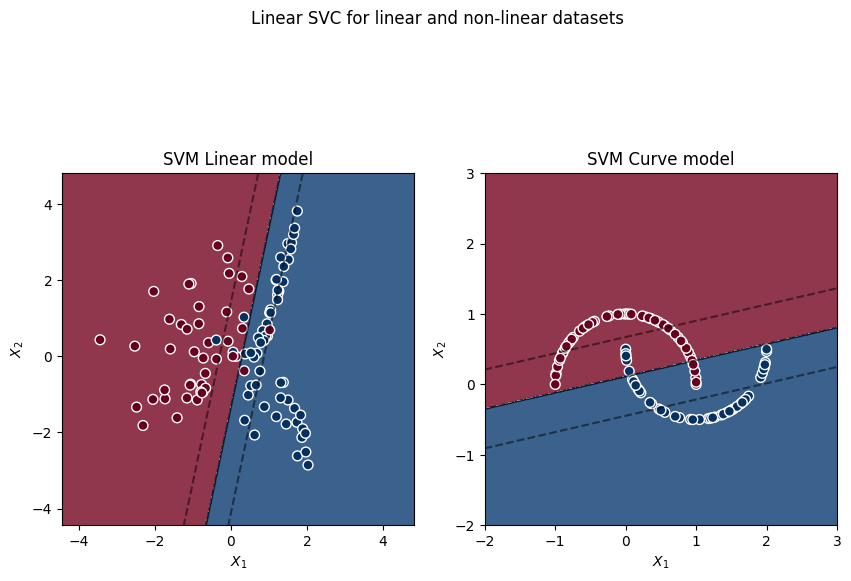

In [1129]:
# make the contour plot
data_dict_curve = {'X': X_curve,
                   'xx':xx_curve,
                   'yy':yy_curve,
                   'x_test':X_test_curve,
                   'y_test':y_test_curve
                    }

data_dict_linear = {'X': X_linear,
                    'xx':xx_linear,
                    'yy':yy_linear,
                    'x_test':X_test_linear,
                    'y_test':y_test_linear
                     }

model_dict= {'SVM Linear': [svm_linear_pred, decision_values_linear, data_dict_linear],
             'SVM Curve': [svm_curve_pred, decision_values_curve, data_dict_curve]}

title = 'Linear SVC for linear and non-linear datasets'

making_contour(model_dict, title)

#### **Precision and Recall**

In [1130]:
# Calculate precision and recall fol linear model
# Predict using the trained model
test_linear_pred = svm_linear.predict(X_test_linear)

precision_linear = precision_score(y_test_linear, test_linear_pred)
recall_linear = recall_score(y_test_linear, test_linear_pred)

# Calculate precision and recall fol curve model
# Predict using the trained model
test_curve_pred = svm_linear.predict(X_test_curve)

precision_curve = precision_score(y_test_curve, test_curve_pred)
recall_curve = recall_score(y_test_curve, test_curve_pred)

print(f'Precision:\nlinear: {precision_linear.round(3)}  -  curve: {precision_curve.round(3)}\n')
print(f'Recal:\nlinear: {recall_linear.round(3)}  -  curve: {recall_curve.round(3)}\n')

Precision:
linear: 0.964  -  curve: 0.654

Recal:
linear: 0.947  -  curve: 0.723



As expected, the precision and recall rates of the linear dataset are quite acceptable. However, it appears that the linear SVC model was not successful in detecting the curved dataset. This inference is supported not only by the contour plots but also by the numerical values obtained.

#### **F1-Score**
Next, I will implement F1-score. There are two ways of implementing this mathematical concept. First, implementing by hand which is quite handy since this method is just a simple mathematical formula, or using pre-made functions. Here I will implement it by hand and compare my result with a premade function.

In [1131]:
def f_score(y_actual, y_predict):

    precision = precision_score(y_actual, y_predict)
    recall = recall_score(y_actual, y_predict)

    f_score = (2.0 * precision * recall) / (precision + recall)

    return f_score

In [1132]:
# calculate f-scores
f1_score_linear = f_score(y_test_linear, test_linear_pred)

f1_score_curve = f_score(y_test_curve, test_curve_pred)

print(f'F-Score:\nLinear: {f1_score_linear.round(3)}  -  Curve: {f1_score_curve.round(3)}')

F-Score:
Linear: 0.956  -  Curve: 0.687


This seams correct because the linear SVC does not work good on the non-linear data, and one can infer this from f-score. Also, sklearn has a library for calculatinf F-Score, so I will use it here and compare it with my function.

In [1133]:
# calculate f1 using sklearn
f1_sklearn_linear = f1_score(y_test_linear, test_linear_pred)

f1_sklearn_curve = f1_score(y_test_curve, test_curve_pred)

print(f'F-Score:\nLinear: {f1_sklearn_linear.round(3)}  -  Curve: {f1_sklearn_curve.round(3)}')

F-Score:
Linear: 0.956  -  Curve: 0.687


These two functions calculate exactly the same scores. Next, I will evaluate consusion matrix.

#### **Confusion Matrix**
This is a good representative of the amount of true positive, true negative, false positive, and false negative. So, I believe one of the best ways of representing this matrix is by using heatmap. cConsequently I will sketch a heat map for this purpose.

In [1134]:
# calculate confusion matrix for linear and non-linear dataset
cm_linear = confusion_matrix(y_test_linear, test_linear_pred)

cm_curve = confusion_matrix(y_test_curve, test_curve_pred)

print(f'Confusion Matrix:\nLinear:\n{cm_linear}\nCurve:\n{cm_curve}')


Confusion Matrix:
Linear:
[[41  2]
 [ 3 54]]
Curve:
[[35 18]
 [13 34]]


the first matrix element (above left) is the number of TRUE POSITIVE, the second (above right) is FALSE NEGATIVE, the third one (below left) is FALSE POSITIVE, and the last element is TRUE NEGATIVE. Also, one can demonstrate this on a heat map.  

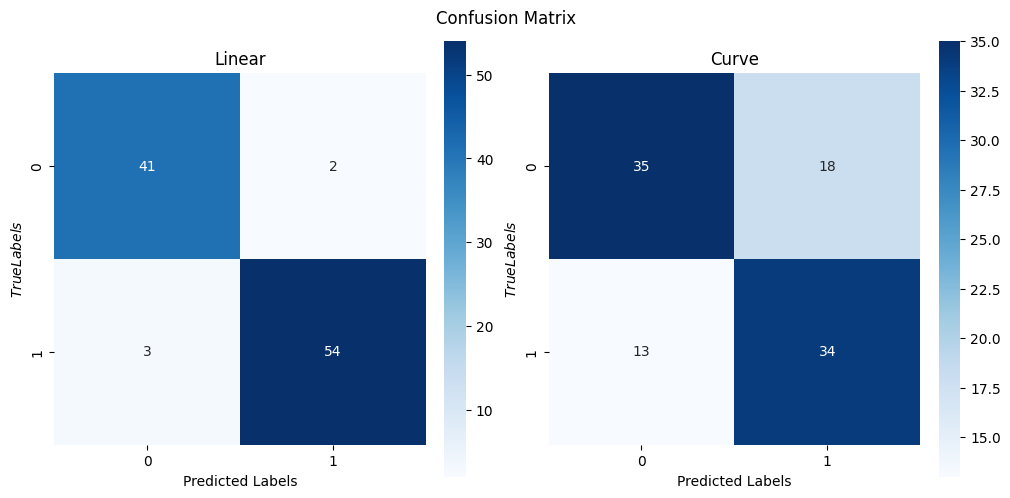

In [1135]:


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), layout='constrained')
fig.suptitle('Confusion Matrix')

# flatten for easier manipulation
axes.ravel()

# Create a heatmap of the confusion matrix
sns.heatmap(cm_linear, annot=True, cmap='Blues', ax=axes[0])
axes[0].set(aspect='equal',
            xlabel='Predicted Labels',
           ylabel='$True Labels$')
axes[0].set_title('Linear')

sns.heatmap(cm_curve, annot=True, cmap="Blues", ax=axes[1])
axes[1].set(aspect='equal',
            xlabel='Predicted Labels',
           ylabel='$True Labels$')
axes[1].set_title('Curve')
plt.show()


As it can be seen, the number of false positive and false negative are both quite higher for the non-linear dataset. Next I will calculate Accuracy.

#### **Accuracy**
Calculating Accuracy for  a binary classification problem is quite handy, so I will make calculate it by hand here, also, I will use sklearn to calculate it.

In [1136]:
def binary_accuracy(y_actual, y_predict):

    cm = confusion_matrix(y_actual, y_predict)

    accuracy = (cm[0,0] + cm[1,1]) / (cm[0,0] + cm[0,1] + cm[1,0] + cm[1,1])

    return accuracy

In [1137]:
# calculate accuracy for linear and non-linear dataset
acc_linear = binary_accuracy(y_test_linear, test_linear_pred)

acc_curve = binary_accuracy(y_test_curve, test_curve_pred)

print(f'Accuracy: Linear: {acc_linear}  -  Curve: {acc_curve}')

Accuracy: Linear: 0.95  -  Curve: 0.69


In [1138]:
# sklearn accuracy
# calculate accuracy for linear and non-linear dataset
acc_linear = accuracy_score(y_test_linear, test_linear_pred)

acc_curve = accuracy_score(y_test_curve, test_curve_pred)

print(f'Accuracy: Linear: {acc_linear}  -  Curve: {acc_curve}')

Accuracy: Linear: 0.95  -  Curve: 0.69


Accuracy is a reliable metric for evaluating the performance of methods as it provides a good indication of their credibility. However, it is important to note that accuracy may not be an ideal representative when dealing with imbalanced datasets. In cases where the clusters are unevenly distributed and have unequal membership, accuracy alone may not provide a complete picture of method performance. In such scenarios, it is recommended to consider additional evaluation metrics that specifically address the challenges posed by imbalanced data, such as precision, recall, F1-score, or area under the receiver operating characteristic curve (AUC-ROC). These metrics provide a more comprehensive assessment of method performance, particularly when dealing with unevenly distributed clusters.

The next method is AUC-ROC. this method was explained in the first norebook of this series of assignments, so here I will just use it for an un-supervised problem.

#### **AUC-ROC**
this method is slightly different from the one in the first assignment, but both of them are used for evaluating the validity of a classification method.

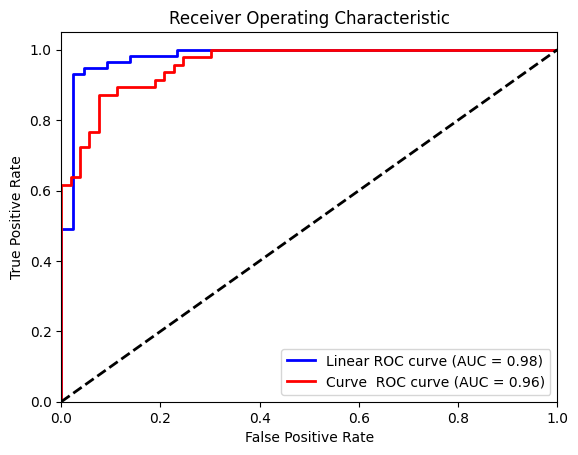

In [1139]:
# Calculate AUC-ROC for linear data
y_prob_linear = svm_linear.decision_function(X_test_linear)
fp_linear, tp_linear, thresholds_linear = roc_curve(y_test_linear, y_prob_linear)
roc_auc_linear = auc(fp_linear, tp_linear)

# Calculate AUC-ROC for non-linear data
y_prob_curve = svm_curve.decision_function(X_test_curve)
fp_curve, tp_curve, thresholds_curve = roc_curve(y_test_curve, y_prob_curve)
roc_auc_curve = auc(fp_curve, tp_curve)

# Plot the ROC curve
plt.figure()
plt.plot(fp_linear, tp_linear, color='blue', lw=2, label=f'Linear ROC curve (AUC = {roc_auc_linear.round(2)})')
plt.plot(fp_curve, tp_curve, color='red', lw=2, label=f'Curve  ROC curve (AUC = {roc_auc_curve.round(2)})')
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Here, this curve show that the model was good in predicting these two datasets, but it was better in predicting the linear model. The last method that I want to use here to evaluate the performance of the model on these two data sets is Cross-Validation.

#### **Cross Validation**
The cross_validate function from the sklearn.model_selection module allows for evaluating a model's performance using cross-validation. It performs cross-validation by splitting the dataset into multiple train-test splits and provides scores for various evaluation metrics. One can obtain scores for different evaluation methods such as AUC-ROC, F1-Score, and Accuracy simultaneously. This provides a comprehensive view of the model's performance across multiple metrics.

Additionally, cross_validate allows you to specify the number of folds or the type of cross-validation strategy to use. It computes scores for each fold and then calculates the mean score across all folds, giving you an estimate of the model's overall validity. By using cross_validate, you can efficiently evaluate your model's performance using various evaluation metrics and gain insights into its effectiveness across different parts of the dataset.

In [1140]:
scoring_list = ['roc_auc', 'f1', 'accuracy']
# Perform cross-validation on the linear model
# since this dataset is quite small I only use 5-fold cross validation
linear_scores = cross_validate(LinearSVC(), X_linear, y_linear, cv=5, scoring=scoring_list)

# Perform cross-validation on the non-linear model
non_linear_scores = cross_validate(LinearSVC(), X_curve, y_curve, cv=5, scoring=scoring_list)

print(f'linear dataset:')
for key in linear_scores:
    print(f'{key}: {linear_scores[key].mean()}')

print(f'\nnon-linear dataset:')
for key in non_linear_scores:
    print(f'{key}: {non_linear_scores[key].mean()}')

linear dataset:
fit_time: 0.0015989780426025391
score_time: 0.0037869930267333983
test_roc_auc: 0.9855
test_f1: 0.9506897167872778
test_accuracy: 0.95

non-linear dataset:
fit_time: 0.0009943485260009766
score_time: 0.003992128372192383
test_roc_auc: 0.96
test_f1: 0.8854038746676893
test_accuracy: 0.885


Cross-validation is a powerful approach for evaluating multiple models on a single dataset or a single model on multiple datasets. In the latter part of this educational notebook, we will delve into the concept of Grid Search. Grid Search is an effective technique that allows us to evaluate various estimators (models) with different parameter combinations and identify the best model among them. With Grid Search, we can systematically explore the parameter space of each estimator and determine the optimal combination of parameters that yields the highest performance. By employing this technique, we can efficiently discover the best model with fine-tuned parameters, enhancing the overall effectiveness of our modeling process.

#### **Grid Search**
The majority of machine learning models contain parameters that can be adjusted to vary how the model learns. For example, the logistic regression model, from sklearn, has a parameter C that controls regularization,which affects the complexity of the model.

How do we pick the best value for C? The best value is dependent on the data used to train the model. One method is to try out different values and then pick the value that gives the best score. This technique is known as a grid search. If we had to select the values for two or more parameters, we would evaluate all combinations of the sets of values thus forming a grid of values.

Before we get into the example it is good to know what the parameter we are changing does. Higher values of C tell the model, the training data resembles real world information, place a greater weight on the training data. While lower values of C do the opposite. 

To see the example and find more explanation click on this <a href="https://www.w3schools.com/python/python_ml_grid_search.asp" target="_blank">link</a> and also this <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html" target="_blank">link</a>.

I implemet this method solely for Logistic Regression and then write a function to loop over different methods, and find the best method for a specific dataset. 

In [1141]:
# Define a set of parameters for Logistic regression
param_grid = {'C': np.arange(1, 20, 0.5), 'penalty': ['l1', 'l2'], 'solver': ['liblinear'], 'multi_class': ['ovr']}
scoring_list = ['roc_auc', 'f1', 'accuracy']

# Create the GridSearchCV object
grid_search = GridSearchCV(LogisticRegression(), param_grid=param_grid, scoring=scoring_list, cv=5, refit='roc_auc')

# Fit the the best model to the data
grid_search.fit(X_linear, y_linear)

# print the best model
print(f'Best Model: {grid_search.best_estimator_}\n')

# print the best parameters
print(f'Best Parameters: {grid_search.best_params_}\n')

# print best score
print(f'Best Score: {grid_search.best_score_.round(3)}\n')

# print all the results of the evaluation metrics
result = grid_search.cv_results_
result_df = pd.DataFrame.from_dict(result)
result_df.head()

Best Model: LogisticRegression(C=1.5, multi_class='ovr', penalty='l1', solver='liblinear')

Best Parameters: {'C': 1.5, 'multi_class': 'ovr', 'penalty': 'l1', 'solver': 'liblinear'}

Best Score: 0.982



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_multi_class,param_penalty,param_solver,params,split0_test_roc_auc,...,std_test_f1,rank_test_f1,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,split3_test_accuracy,split4_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy
0,0.001197,0.000399,0.004187,0.001465,1.0,ovr,l1,liblinear,"{'C': 1.0, 'multi_class': 'ovr', 'penalty': 'l...",0.9875,...,0.035739,73,0.9,0.975,1.0,0.925,0.925,0.945,0.036742,72
1,0.000996,0.000001,0.003195,0.000748,1.0,ovr,l2,liblinear,"{'C': 1.0, 'multi_class': 'ovr', 'penalty': 'l...",0.9875,...,0.035285,72,0.9,0.975,1.0,0.925,0.925,0.945,0.036742,72
2,0.001417,0.000493,0.003579,0.001193,1.5,ovr,l1,liblinear,"{'C': 1.5, 'multi_class': 'ovr', 'penalty': 'l...",0.9875,...,0.034423,54,0.9,0.975,1.0,0.925,0.950,0.950,0.035355,54
3,0.000798,0.000746,0.002987,0.000634,1.5,ovr,l2,liblinear,"{'C': 1.5, 'multi_class': 'ovr', 'penalty': 'l...",0.9875,...,0.035739,73,0.9,0.975,1.0,0.925,0.925,0.945,0.036742,72
4,0.000595,0.000486,0.002798,0.000754,2.0,ovr,l1,liblinear,"{'C': 2.0, 'multi_class': 'ovr', 'penalty': 'l...",0.9875,...,0.034423,54,0.9,0.975,1.0,0.925,0.950,0.950,0.035355,54


Based on the GridSearchCV function, the optimal set of parameters for the LogisticRegression model with our linear dataset is the one mentioned above. Also, the above dataframe contains all the information about the tests, so one can go through all the information by evaluating different columns. 

In [1142]:
# there is two ways of prediction: first using the object of grid_search, second use the best method.
# the oucomes are the same but the latter provides more flexibility for further investigations and operations.
xx, yy = make_meshgrid(X_linear)
grid = np.c_[xx.ravel(), yy.ravel()] 
best = grid_search.best_estimator_
lr_prob = best.predict_proba(grid)[:, 1].reshape(xx.shape)

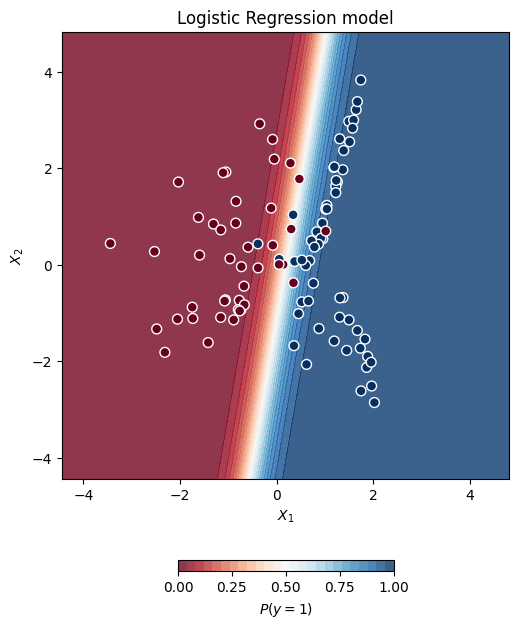

In [1143]:
# make the contour plot
data_dict = {'X': X_linear,
             'xx':xx,
             'yy':yy,
             'x_test':X_test_linear,
             'y_test':y_test_linear
             }

model_dict= {'Logistic Regression': [lr_prob, data_dict]}

title = ''

making_contour(model_dict, title)

This is the best prediction of the system. To continue I will design a function that can iterate over different methods and find the best method for a dataset.

In [1144]:
def multiple_grid_search(estimator_dict, scoring_list, cv_number, refit_method, data_dict):

    final_dict = {}

    for name in estimator_dict.keys():
        # Create the GridSearchCV object
        grid_search = GridSearchCV(estimator=estimator_dict[name][0], param_grid=estimator_dict[name][1],
                                    scoring=scoring_list, cv=cv_number, refit=refit_method)
        
        # Fit the the best model to the data
        grid_search.fit(data_dict['x'], data_dict['y'])

        # Save the best estimator for each model
        final_dict[name] = {'best_model': grid_search.best_estimator_,
                            'best_parameters': grid_search.best_params_,
                            'best_score': grid_search.best_score_}

    # order the dictionary based on the magnitude of the scores
    final_dict = dict(sorted(final_dict.items(), key=lambda item: -1 * item[1]['best_score']))
     
    return final_dict

Now, I will implement this function for the non-linear dataset to find the best method for it.

In [1145]:
# make parameters dictionaries
#LinearSVC
svc_param = {'C': np.arange(0.01, 10, 0.25),
             'kernel': ['linear', 'rbf', 'poly'],
             'gamma': ['scale', 'auto'],
             'degree': np.arange(2,10,1)}

# GAMS
gams_param= param_grid = [{'s(0)': [5, 10, 15], 's(1)': [5, 10, 15]},
                          {'s(0)': [10, 20, 30], 's(1)': [10, 20, 30]}]

# Create a pipeline with PolynomialFeatures and LogisticRegression
logistic_regression_pipeline = Pipeline([('polynomial', PolynomialFeatures()),
                                         ('LogisticRegression', LogisticRegression())])

# Logitic Regression
lr_param = {'polynomial__degree': np.arange(2,10,1),
            'LogisticRegression__C':  np.arange(0.01, 10, 0.25),
            'LogisticRegression__penalty': ['l1', 'l2']}

# Scoring list
scoring_list = ['roc_auc', 'f1', 'accuracy']

# Make estimator dictionary
estimator_dict={'SVC': [SVC(), svc_param],
                'LogisitcGAMS': [LogisticGAM(), gams_param],
                'LogisticRegression': [logistic_regression_pipeline, lr_param]}

# Make data dictionary
data_dict =  {'x': X_curve, 
              'y': y_curve}
final_dict = multiple_grid_search(estimator_dict, scoring_list, 5, 'roc_auc', data_dict)

c:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 76, in _cached_call
    return cache[method]
KeyError: 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 373, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "c:\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 78, in _cached_call
    result = getattr(estimator, method)(*args, **kwargs)
  File "c:\Anaconda3\lib\site-packages\pygam\terms.py", line 1111, in __getattr__
    return self._super_get(name)
  File "c:\Anaconda3\lib\site-packages\pygam\terms.py", line 1031, in _super_get
    return super(MetaTermMix

In [1146]:
final_dict

{'SVC': {'best_model': SVC(C=0.51, degree=2),
  'best_parameters': {'C': 0.51,
   'degree': 2,
   'gamma': 'scale',
   'kernel': 'rbf'},
  'best_score': 1.0},
 'LogisitcGAMS': {'best_model': LogisticGAM(callbacks=[Deviance(), Diffs(), Accuracy()], 
     fit_intercept=True, max_iter=100, terms=s(0) + s(1) + intercept, 
     tol=0.0001, verbose=False),
  'best_parameters': {'s(0)': 5, 's(1)': 5},
  'best_score': nan},
 'LogisticRegression': {'best_model': Pipeline(steps=[('polynomial', PolynomialFeatures(degree=7)),
                  ('LogisticRegression', LogisticRegression(C=0.26))]),
  'best_parameters': {'LogisticRegression__C': 0.26,
   'LogisticRegression__penalty': 'l2',
   'polynomial__degree': 7},
  'best_score': 1.0}}

These are the best tuned methods for the non-linear dataset. In this stage one can sketch their contour plot.

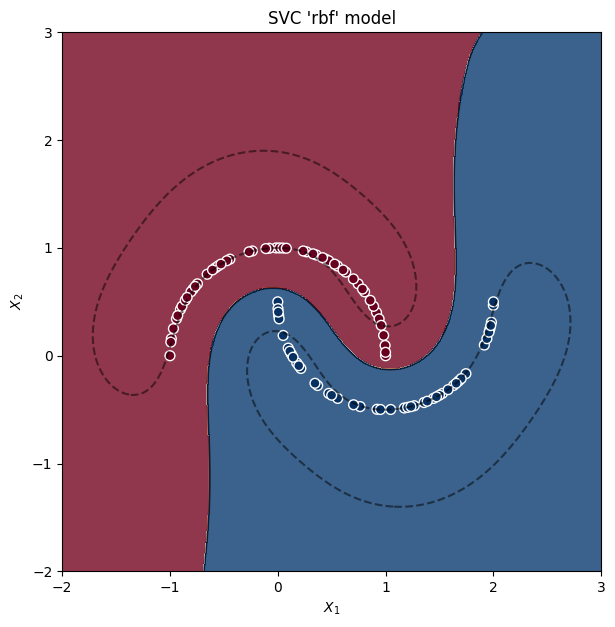

In [1147]:
# SVC best model
svc_best = final_dict['SVC']['best_model']
xx, yy = make_meshgrid(X_curve)
grid = np.c_[xx.ravel(), yy.ravel()] 
svc_prob = svc_best.predict(grid).reshape(xx.shape)
decision_values_model = svc_best.decision_function(grid).reshape(xx.shape)

# make the contour plot
data_dict = {'X': X_curve,
             'xx':xx,
             'yy':yy,
             'x_test':X_test_curve,
             'y_test':y_test_curve
             }

model_dict= {'SVC \'rbf\'': [svc_prob, decision_values_model, data_dict]}

title = ''

making_contour(model_dict, title)


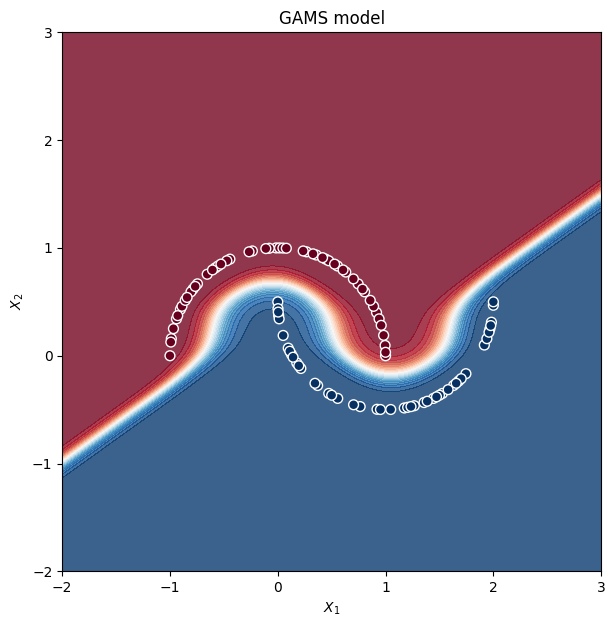

In [1148]:
# SVC best model
gams_best = final_dict['LogisitcGAMS']['best_model']
xx, yy = make_meshgrid(X_curve)
grid = np.c_[xx.ravel(), yy.ravel()] 
predictions = gams_best.predict(X_test_curve)
lr_prob = gams_best.predict_proba(grid).reshape(xx.shape)

# make the contour plot
data_dict = {'X': X_curve,
             'xx':xx,
             'yy':yy,
             'x_test':X_test_curve,
             'y_test':y_test_curve
             }

model_dict= {'GAMS': [lr_prob, data_dict]}

title = ''

making_contour(model_dict, title)

In [1160]:
lr_best = final_dict['LogisticRegression']['best_model']


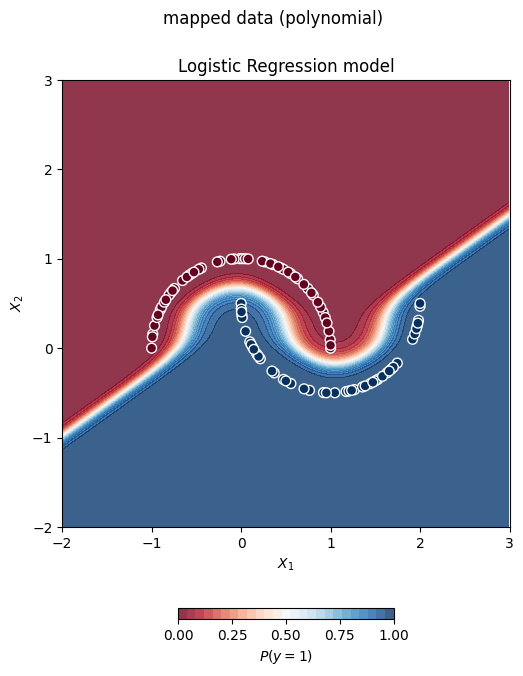

In [1162]:

xx, yy = make_meshgrid(X_curve)
grid = np.c_[xx.ravel(), yy.ravel()]

# Apply the same preprocessing steps to the test data
X_test_poly = lr_best.named_steps['polynomial'].transform(X_test_curve)
grid_poly = lr_best.named_steps['polynomial'].transform(grid)

# Predict on the transformed test data
y_pred = lr_best.named_steps['LogisticRegression'].predict(grid_poly).reshape(xx.shape)


# make the contour plot
data_dict = {'X': X_curve,
             'xx':xx,
             'yy':yy,
             'x_test':X_test_curve,
             'y_test':y_test_curve
             }

model_dict= {'Logistic Regression': [lr_prob, data_dict]}

title = 'mapped data (polynomial)'

making_contour(model_dict, title)

So in the next step, I will use this configuration on another dataset.